In [1]:
BENCHMARK_FILE = 'benchmark.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set();

In [3]:
names = ['file', 'extractor', 'references', 'time_ms']
types = ['str', 'str', 'int', 'int']
benchmark_data = pd.read_csv(BENCHMARK_FILE, 
                             names=names,
                             dtype=dict(zip(names, types)))
benchmark_data['parsed_smth'] = benchmark_data['references'] > 0

In [4]:
benchmark_data.head()

,file,extractor,references,time_ms,parsed_smth
0,1707.08836v2,Cermine,35,30477,True
1,1707.08836v2,Custom,35,3531,True
2,1707.08836v2,Grobid,35,6004,True
3,1809.02905v4,Cermine,1,25721,True
4,1809.02905v4,Custom,38,11376,True


In [5]:
benchmark_data.groupby('extractor').agg(
    average_references=pd.NamedAgg(column='references', aggfunc='mean'),
    average_time_ms=pd.NamedAgg(column='time_ms', aggfunc='mean'),
    parsed_files=pd.NamedAgg(column='parsed_smth', aggfunc='sum'),
    total_files=pd.NamedAgg(column='parsed_smth', aggfunc='count')
)

,average_references,average_time_ms,parsed_files,total_files
extractor,,,,
Cermine,28.52,16981.78,98.0,100
Custom,35.88,6997.65,99.0,100
Grobid,35.43,7958.45,97.0,100


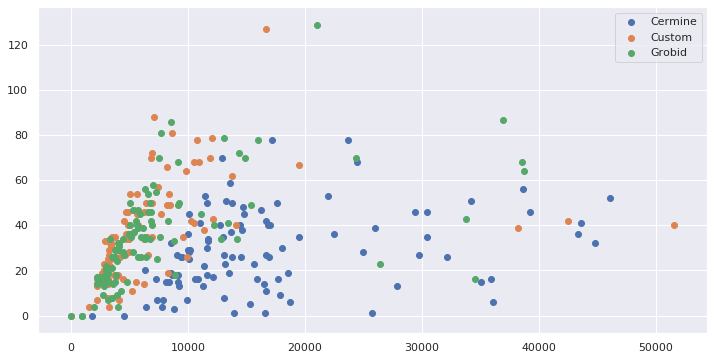

In [6]:
plt.figure(figsize=(12, 6))
for key, grp in benchmark_data.groupby(['extractor']):
    plt.scatter(grp['time_ms'], grp['references'], label=key)
plt.legend()
plt.show()